In [2]:
import glob
import json
main_path = '/home/diego/Downloads/data_sqm/en plataforma/**.json'

paths = glob.glob(main_path, recursive=True)
# paths_2a = [path for path in paths if '2a' in path]
# paths_3a = [path for path in paths if '3a' in path]
# paths_5a = [path for path in paths if '5a' in path]
# paths_6a = [path for path in paths if '6a' in path]
# paths_7a = [path for path in paths if '7a' in path]
# paths_pam = [path for path in paths if 'pam' in path]
# selected_paths = [*paths_2a, *paths_3a, *paths_5a, *paths_6a, *paths_7a, *paths_pam]
# other_paths = [path for path in paths if path not in selected_paths]
# paths = other_paths
print(len(paths))
print(paths)

123
['/home/diego/Downloads/data_sqm/en plataforma/pam5_04052025_100m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/pam5_04052025_150m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/rbs_04052025_150m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/9d_04072025_100m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/7a_04012025_100m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/rbs_04052025_150m_7ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/hk16-sectorb_04102025_150m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/9f_04072025_150m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/7a_04012025_100m_10ms_50khz.json', '/home/diego/Downloads/data_sqm/en plataforma/6a_04012025_100m_10ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/hk16-sectorc_04102025_150m_7ms_100khz.json', '/home/diego/Downloads/data_sqm/en plataforma/9e_04072025_150m_10ms_10

In [26]:
import glob
import json
main_path = '/home/diego/Downloads/data_sqm/en plataforma/**.json'

paths = glob.glob(main_path, recursive=True)
print(len(paths))

123


In [31]:
area_total = 0
for path in paths:
    with open(path, 'r') as f:
        data = json.load(f)
        area_m2 = data['Area poza medida']
        area_total += area_m2

In [32]:
(area_total/0.95)

6275448.1022701645

In [33]:
list_of_percentages = []
for path in paths:
    file_name = path.split('/')[-1][:-5]
    poza = file_name.split('_')[0]
    poza = poza.upper()
    fecha = file_name.split('_')[1]
    fecha = fecha[2:4]+'-'+fecha[:2]+'-'+fecha[4:]
    altura = file_name.split('_')[2][:-1]
    velocidad = file_name.split('_')[3][:-2]
    frecuencia = file_name.split('_')[4][:-3]
    with open(path, 'r') as f:
        data = json.load(f)
        area_m2 = data['Area poza medida']
        data_sqm = data['data_sqm']
        rasante = data_sqm['Rasante (m)']
        cota_salmuera_sqm = data_sqm['Cota Salmuera sqm (m)']
        cota_sal_sqm = data_sqm['Cota Sal sqm (m)']
        sal_sqm = data_sqm['Sal sqm (cm)']
        salmuera_sqm = data_sqm['Salmuera sqm (cm)']

        altura_promedio = data['altura sal (cm) (lidar)']
        altura_promedio_diagonal_1 = data['diagonal1']['mean']*100
        altura_promedio_diagonal_2 = data['diagonal2']['mean']*100

        dif_total_diag_1 = altura_promedio_diagonal_1-altura_promedio
        dif_percentage_total_diag_1 = (dif_total_diag_1)/altura_promedio*100
        dif_total_diag_2 = altura_promedio_diagonal_2-altura_promedio
        dif_percentage_total_diag_2 = (dif_total_diag_2)/altura_promedio*100

        list_of_percentages.append([poza, fecha, altura, velocidad, frecuencia, area_m2, rasante, cota_sal_sqm, cota_salmuera_sqm, sal_sqm, salmuera_sqm, altura_promedio, altura_promedio_diagonal_1, dif_total_diag_1, dif_percentage_total_diag_1, altura_promedio_diagonal_2, dif_total_diag_2,dif_percentage_total_diag_2])

In [34]:
import numpy as np
import pandas as pd
# Nombre, Fecha, Altura, Velocidad, Frecuencia, Area, Altura Promedio Sal (AS), Altura Sal D1, Diferencia D1-AS, % Diferencia D1-AS, Altura Sal D2, Diferencia D2-AS, % Diferencia D2-AS
# Agregar data sqm
# Falta estado de vuelos #2 área

array_of_percentages = np.array(list_of_percentages)
df_of_percentages = pd.DataFrame(array_of_percentages, columns=['Poza', 'Fecha [dd-mm-aa]', 'Altura [m]', 'Velocidad [m/s]', 'Frecuencia [kHz]', 'Área [m^2]', 'Rasante [m]', 'Cota Sal SQM [m]', 'Cota Salmuera SQM [m]', 'Altura Sal SQM [cm]', 'Altura Salmuera SQM [cm]', 'Altura Promedio Sal (AS) [cm]', 'Altura Sal D1 [cm]', 'Diferencia D1-AS [cm]', 'Diferencia D1-AS [%]', 'Altura Sal D2 [cm]', 'Diferencia D2-AS [cm]', 'Diferencia D2-AS [%]'])
df_of_percentages
# export df
df_of_percentages.to_csv('/home/diego/Downloads/ResumenAlturas.csv')

In [35]:
idx_d1, idx_d2 = 3, 6
new_array_of_percentages = array_of_percentages[:, [idx_d1, idx_d2]].astype(float)
mean = np.mean(new_array_of_percentages, axis=0)
median = np.median(new_array_of_percentages, axis=0)
std = np.std(new_array_of_percentages, axis=0)
min = np.min(new_array_of_percentages, axis=0)
max = np.max(new_array_of_percentages, axis=0)
columns = ['Resumen Diferencia D1-HS', 'Resumen Diferencia D2-HS']
indexes = ['Promedio', 'Mediana', 'Desviación Estándar', 'Mínimo', 'Máximo']
df = pd.DataFrame([mean, median, std, min, max], columns=columns, index=indexes)
df

,Resumen Diferencia D1-HS,Resumen Diferencia D2-HS
Promedio,8.878049,2300.405098
Mediana,10.000000,2300.416000
Desviación Estándar,1.451578,0.160341
Mínimo,7.000000,2299.760000
Máximo,10.000000,2300.772000


In [7]:
# remove outliers
def remove_outliers(data, threshold=3):
    q1 = np.percentile(data, 10)
    q3 = np.percentile(data, 90)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return data[(data > lower_bound) & (data < upper_bound)]

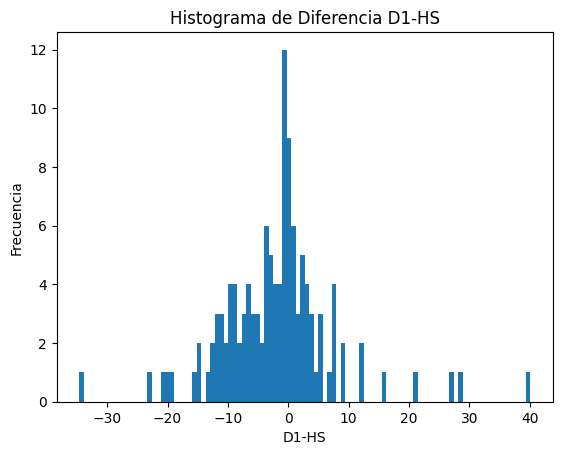

Promedio: -2.015733648293886, Mediana: -1.094930763434398, Desviación: 9.428494342304887


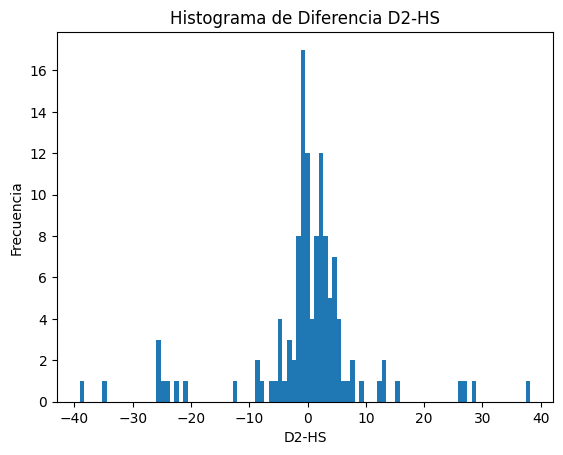

Promedio: -0.030629851493585235, Mediana: 0.3106051063178441, Desviación: 10.159442062167214


In [8]:
import matplotlib.pyplot as plt
vd1hs = array_of_percentages[:, idx_d1].astype(float)
vd1hs = remove_outliers(vd1hs)
vd2hs = array_of_percentages[:, idx_d2].astype(float)
vd2hs = remove_outliers(vd2hs)
plt.hist(vd1hs, bins=100)
plt.xlabel('D1-HS')
plt.ylabel('Frecuencia')
plt.title('Histograma de Diferencia D1-HS')
plt.show()
mean_vd1 = np.mean(vd1hs)
median_vd1 = np.median(vd1hs)
std_vd1 = np.std(vd1hs)
print(f"Promedio: {mean_vd1}, Mediana: {median_vd1}, Desviación: {std_vd1}")
plt.hist(vd2hs, bins=100)
plt.xlabel('D2-HS')
plt.ylabel('Frecuencia')
plt.title('Histograma de Diferencia D2-HS')
plt.show()
mean_vd2 = np.mean(vd2hs)
median_vd2 = np.median(vd2hs)
std_vd2 = np.std(vd2hs)
print(f"Promedio: {mean_vd2}, Mediana: {median_vd2}, Desviación: {std_vd2}")